# Implementing Support vector Regressor on Admission Prediction Dataset 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv')

In [3]:
data.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#checking basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### Observations:
- There are no missing values in this dataset

In [5]:
# dataset columns 
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
#removing spsces from feature names
data.columns = [col.strip() for col in data.columns ]

In [7]:
# statistical analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


C:\Users\Wasu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Wasu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Wasu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

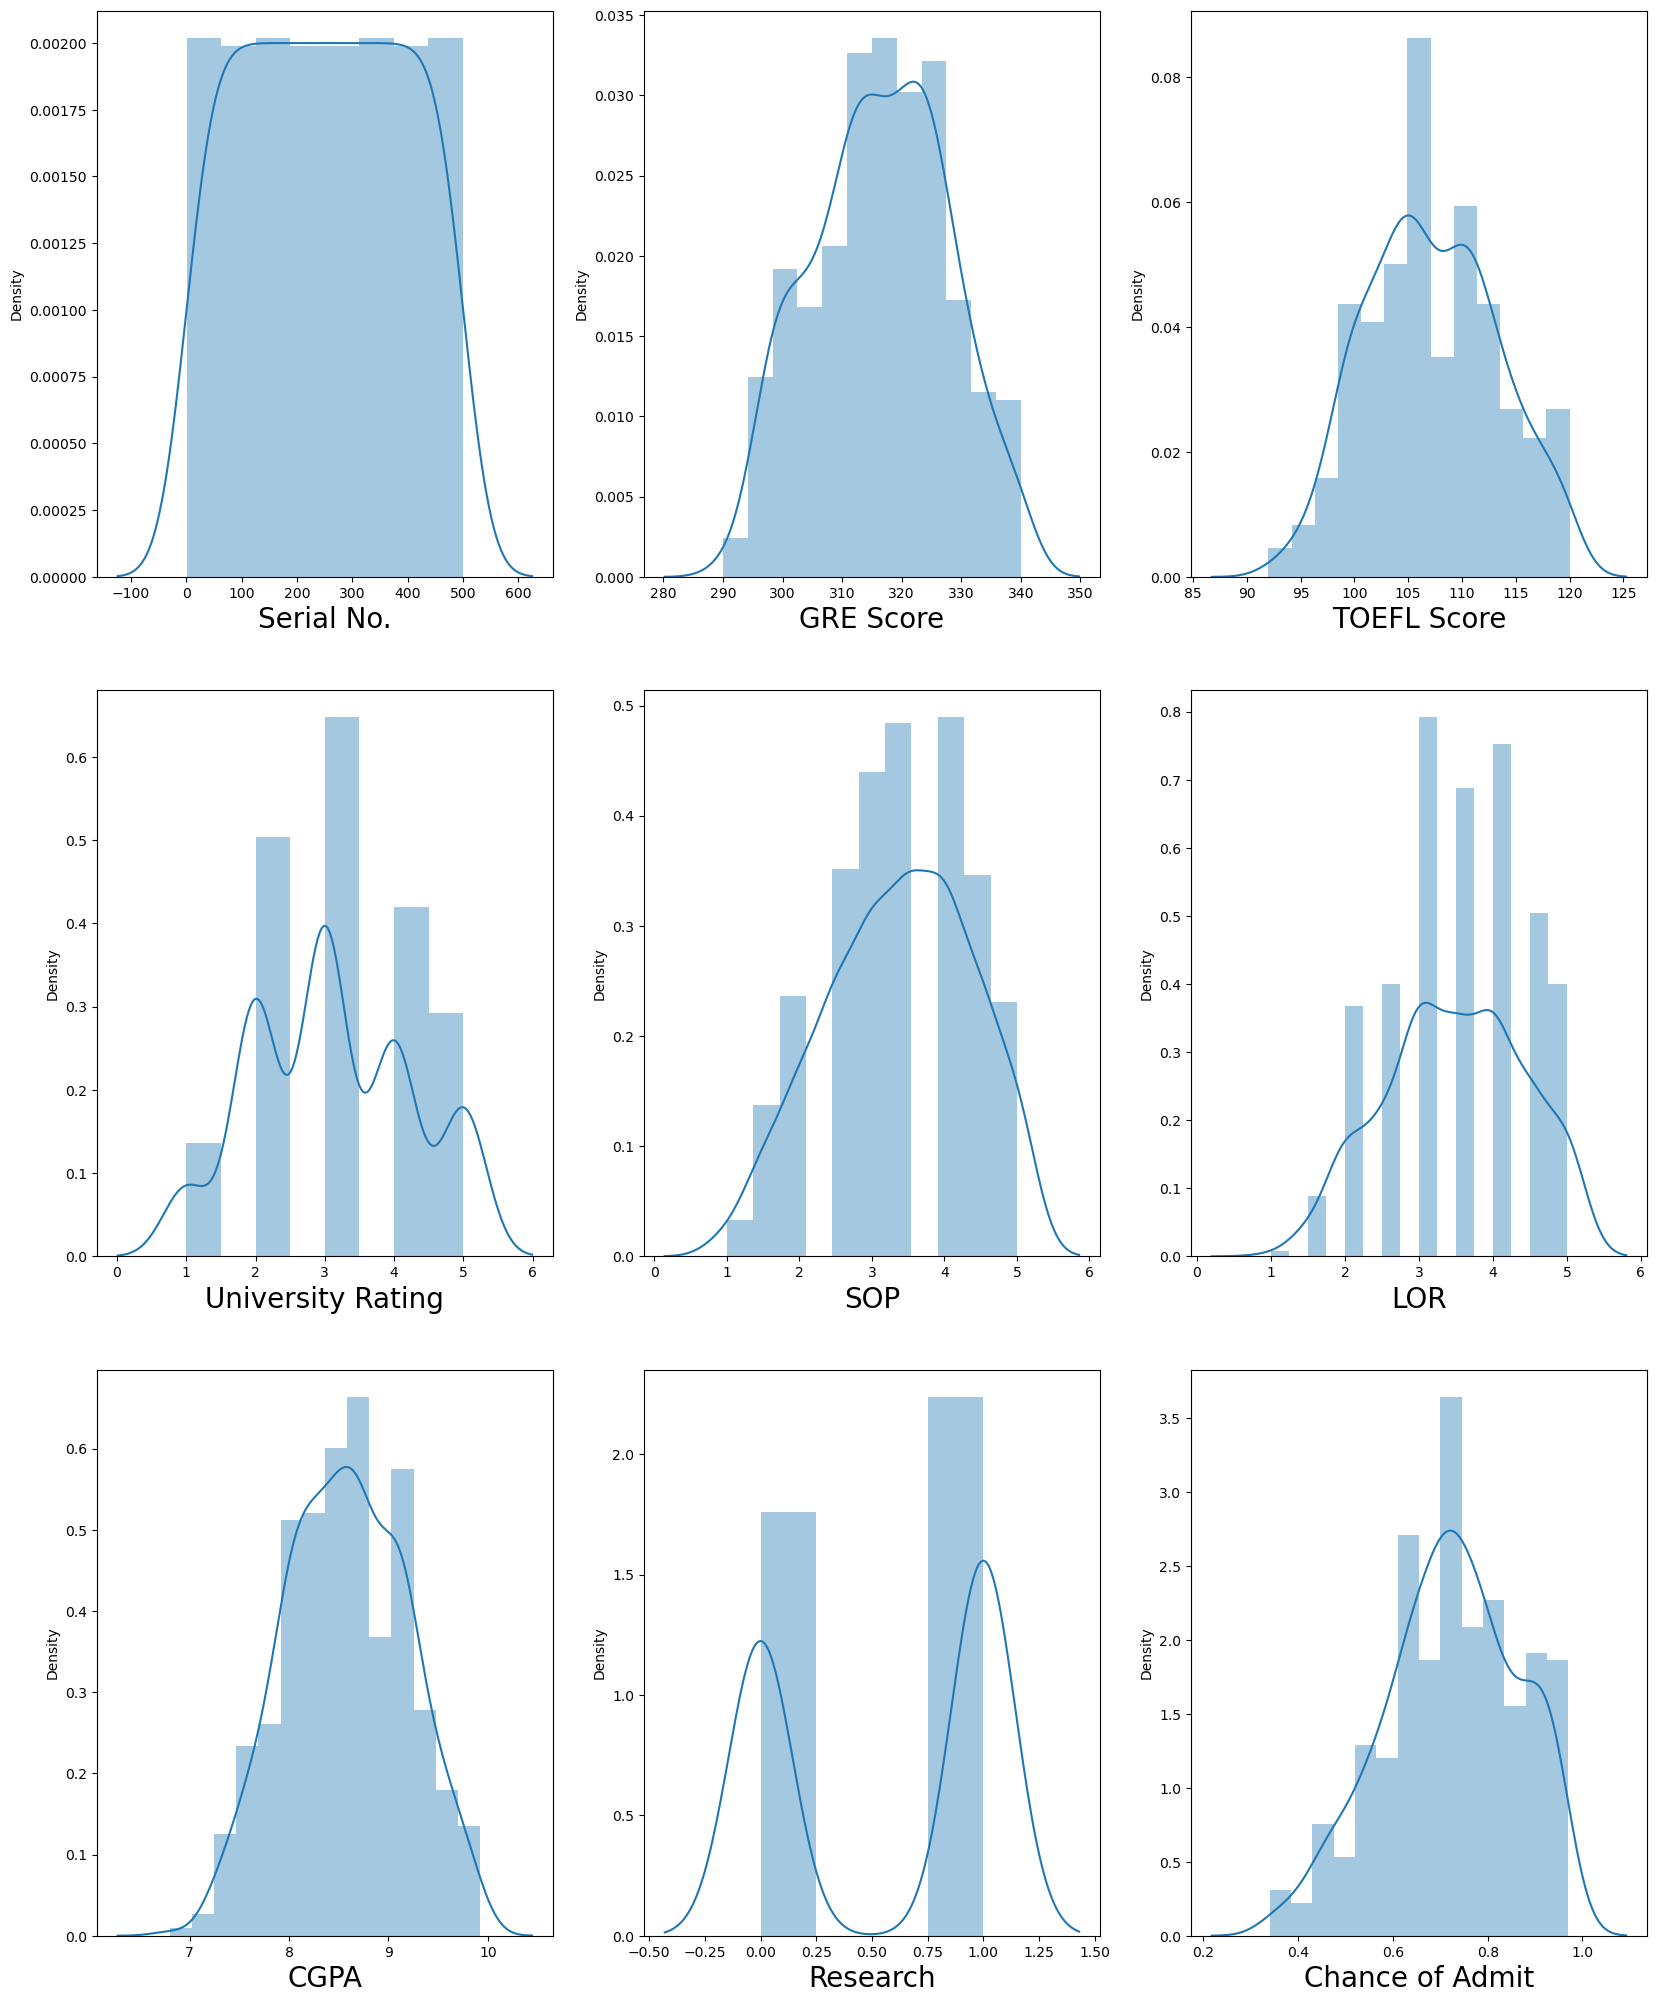

In [8]:
# distribution of data 
plt.figure(figsize=(20,25))
plot = 1

for col in data:
    if plot<=9 :     
        ax = plt.subplot(3,3,plot)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
        
    plot+=1
plt.show()

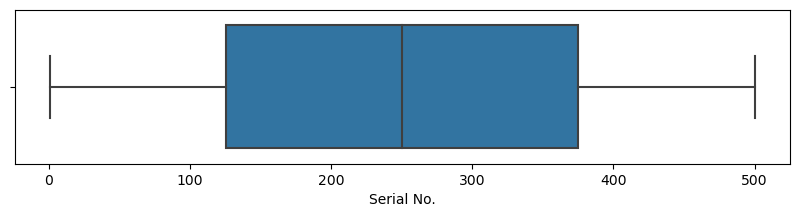

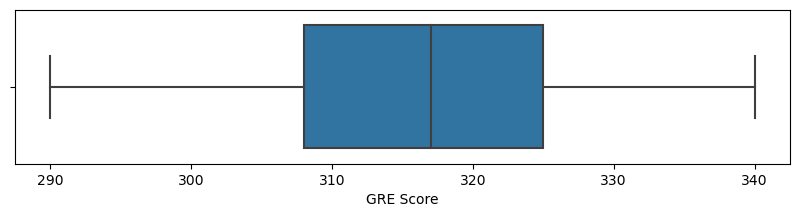

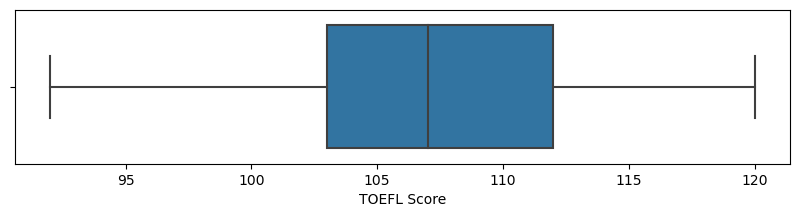

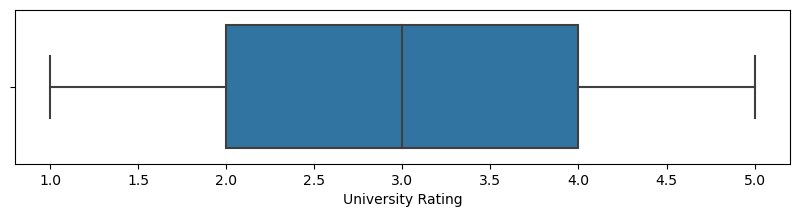

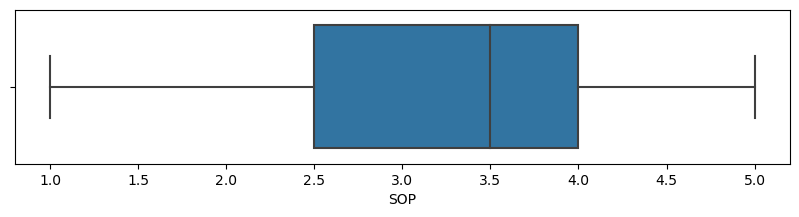

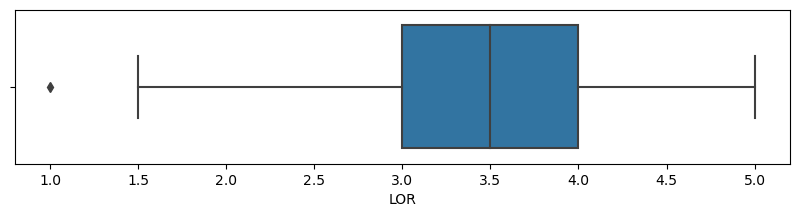

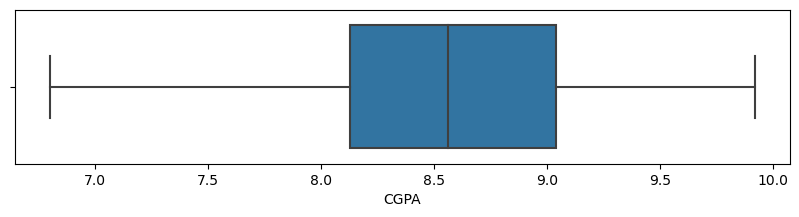

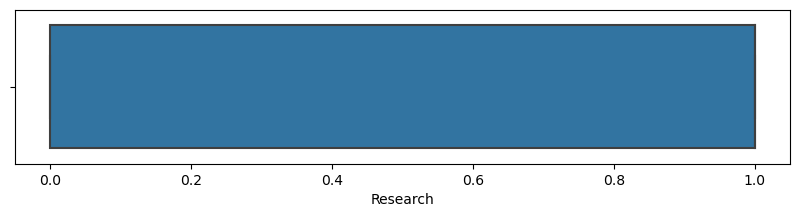

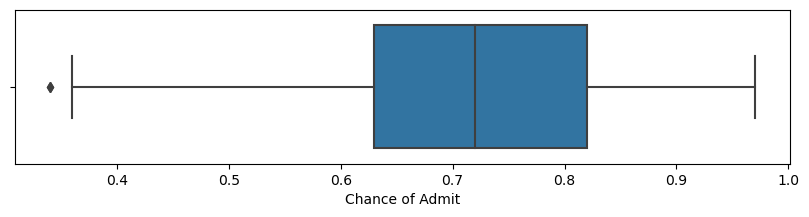

In [9]:
#checking outliers
for col in data:
        plt.figure(figsize=(10,2))
        sns.boxplot(data=data, x=col)

### Observations:
- here we can see that the no of outlies are very less

## Independent Features and Dependent Features

In [26]:
X=data.drop('Chance of Admit', axis=1)
X.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


In [27]:
y=data['Chance of Admit']
y.head(5)

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

## Splitting the Dataset into Training and Testing Dataset

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(335, 8) (335,)
(165, 8) (165,)


## Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Support Vector Regression Model

In [31]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)

SVR()

In [32]:
train_score = model.score(X_train, y_train)
train_score

0.8002696421631225

In [36]:
y_pred=model.predict(X_test)
y_pred

array([0.85327566, 0.70566642, 0.56577617, 0.68513912, 0.73073652,
       0.84759115, 0.50884113, 0.63512354, 0.71546806, 0.75966639,
       0.57183244, 0.71682881, 0.6228902 , 0.87034528, 0.80538203,
       0.45539152, 0.78034293, 0.51298148, 0.52072102, 0.57781496,
       0.65704711, 0.53857913, 0.7306496 , 0.78872557, 0.69357076,
       0.5926933 , 0.843987  , 0.82839114, 0.59525329, 0.75285329,
       0.56177445, 0.761017  , 0.57579346, 0.84035618, 0.57955442,
       0.7686765 , 0.50127929, 0.88017372, 0.66595737, 0.64142824,
       0.87065485, 0.52080723, 0.63350483, 0.85528765, 0.82310479,
       0.47790267, 0.85620031, 0.74364715, 0.76326758, 0.85361512,
       0.81739371, 0.55214794, 0.6810001 , 0.53159075, 0.90702514,
       0.56836681, 0.83980413, 0.59580852, 0.6745631 , 0.45741035,
       0.59644739, 0.72846957, 0.5933817 , 0.62610304, 0.48959131,
       0.54214166, 0.83976541, 0.8396225 , 0.67509268, 0.69812838,
       0.65151703, 0.79682174, 0.69471546, 0.58558049, 0.51274

## Performance Metrics

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_absolute_error(y_test, y_pred)))

0.004878474514395204
0.05626497201211845
0.23720238618554926


In [38]:
#R-squared & Adjusted R-Squared
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.7632199437959383


In [39]:
#adjusted R square
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7510773768111145